<a href="https://colab.research.google.com/github/ujjwalbb30/Ujjwal_DATA606/blob/main/notebooks/Step_2_B_Basic_EDA_Text_Ujjwal_PF10610.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DATA 606 : Capstone Project**
##**Course Instructor: Dr. Chaojie Wang**
>**Data Science Department**

>**University of Maryland, Baltimore County**

###**Submitted By: Ujjwal**
>**UMBC ID: PF10610**

##**Basic Exploratory Data Analysis (EDA)**

###**Installing Required Libraries**

In [ ]:
!pip install wordcloud

In [ ]:
!pip install --upgrade gensim

In [ ]:
!pip install textblob

In [ ]:
!pip install langid

In [ ]:
! pip install yellowbrick

###**Importing Required Libraries**

In [ ]:
# importing required dependencies

# importing pandas, numpy, random, matplotlib and their required modules
import pandas as pd
import numpy as np
import random
from numpy.random import seed
seed(42)
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg

# importing other required libraries
from tqdm.notebook import tqdm
from wordcloud import WordCloud, STOPWORDS
from gensim.parsing.preprocessing import remove_stopwords
from langid.langid import LanguageIdentifier, model
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import nltk.corpus
from nltk.probability import FreqDist
import re
from yellowbrick.text import DispersionPlot
from yellowbrick.datasets import load_hobbies

###**Mounting the Drive**

In [40]:
# mounting the drive to access data files
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# defining the path of data in drive (path to copy the data from)
# defining the path where the data should be copied
drive_path = '/content/gdrive/MyDrive/DATA_606_Capstone_Project_Ujjwal/Dataset'
local_path = '/content'

# copying the data from drive to machine
!cp -av '/content/gdrive/MyDrive/DATA_606_Capstone_Project_Ujjwal/Dataset' '/content'

In [42]:
# importing the dataframe
imgpath_text_df = pd.read_csv('/content/gdrive/MyDrive/DATA_606_Capstone_Project_Ujjwal/Data_2/imgpath_text_df.csv')
display(imgpath_text_df)

label                                             path  \
0       Note             /content/Dataset/Note/2073440248.jpg   
1       Note             /content/Dataset/Note/2048858141.jpg   
2       Note               /content/Dataset/Note/10384492.jpg   
3       Note               /content/Dataset/Note/71460901.jpg   
4       Note  /content/Dataset/Note/1003403894_1003403895.jpg   
...      ...                                              ...   
3487  Report  /content/Dataset/Report/507963083_507963090.jpg   
3488  Report  /content/Dataset/Report/507767713_507767722.jpg   
3489  Report  /content/Dataset/Report/507745286_507745288.jpg   
3490  Report  /content/Dataset/Report/510907182_510907183.jpg   
3491  Report  /content/Dataset/Report/506348523_506348524.jpg   

                                                   text  \
0      \n\nARTHUR C. PADOAN\n\nerz0rVyelo?\n\nIV G7 ...   
1     et ao\n\ncacgion Cas PY Heap\n\n \n\n \n\n \n\...   
2      \n\n_ PPD AY pid Be\n\n7 Cane CO cirneten PP ...   
3     190242521\n\nPRODUC]\n\n \n\nED FROM\n\nB&W WE...   
4       \n\n \n\n \n\n \n\n  \n\nof .\n\nSLZESE STUP...   
...                                                 ...   
3487  104\n\nDr. Rainer Wendeborn/Thomas Leutner\nRH...   
3488   \n\n \n\nSPECIAL PUBLIC RELATIONS PROGRAMS\n\...   
3489   \n\n \n\n      \n\n& Tobacco Company Cot, Me ...   
3490  MARYLAND TOBACCO\n4 .\n\nSOUTHERN MARYLAND TOB...   
3491   \n\nLe\n\no%\n\nPER BwALSH .\n\nJuly ~ Septem...   

                                             clean_text  
0                       arthur c padoan erz rvyelo iv g  
1                             et ao cacgion cas py heap  
2     ppd ay pid be cane co cirneten pp mae a pf e a...  
3     produc ed from b w web site the health policy ...  
4     of slzese stupts cover bu do faw froo o lavwel...  
...                                                 ...  
3487  dr rainer wendeborn thomas leutner rhone poule...  
3488  special public relations programs en backgroun...  
3489  tobacco company cot me a bhi usyi horizon reta...  
3490  maryland tobacco southern maryland tobacco boa...  
3491  le o per bwalsh july september quarterly repor...  

[3492 rows x 4 columns]

In [43]:
# checking NaNs and replacing any with ' ' string
print('Number of NaN values in clean_text column:\n',imgpath_text_df['clean_text'].isnull().sum())

# filling NaNs with ' '
imgpath_text_df.fillna(' ', inplace=True)

# viewing NaNs again
print('Number of NaN values in clean_text column after replacing:\n',imgpath_text_df['clean_text'].isnull().sum())

Number of NaN values in clean_text column:
 21
Number of NaN values in clean_text column after replacing:
 0


##**Detecting the language of all text**

In [44]:
# now we will detect the language for each row
identifier = LanguageIdentifier.from_modelstring(model, norm_probs=True)
imgpath_text_df['language'] = [identifier.classify(text)[0] for text in imgpath_text_df['clean_text']]
imgpath_text_df['lang_prob'] = [identifier.classify(text)[1] for text in imgpath_text_df['clean_text']]
display(imgpath_text_df)

label                                             path  \
0       Note             /content/Dataset/Note/2073440248.jpg   
1       Note             /content/Dataset/Note/2048858141.jpg   
2       Note               /content/Dataset/Note/10384492.jpg   
3       Note               /content/Dataset/Note/71460901.jpg   
4       Note  /content/Dataset/Note/1003403894_1003403895.jpg   
...      ...                                              ...   
3487  Report  /content/Dataset/Report/507963083_507963090.jpg   
3488  Report  /content/Dataset/Report/507767713_507767722.jpg   
3489  Report  /content/Dataset/Report/507745286_507745288.jpg   
3490  Report  /content/Dataset/Report/510907182_510907183.jpg   
3491  Report  /content/Dataset/Report/506348523_506348524.jpg   

                                                   text  \
0      \n\nARTHUR C. PADOAN\n\nerz0rVyelo?\n\nIV G7 ...   
1     et ao\n\ncacgion Cas PY Heap\n\n \n\n \n\n \n\...   
2      \n\n_ PPD AY pid Be\n\n7 Cane CO cirneten PP ...   
3     190242521\n\nPRODUC]\n\n \n\nED FROM\n\nB&W WE...   
4       \n\n \n\n \n\n \n\n  \n\nof .\n\nSLZESE STUP...   
...                                                 ...   
3487  104\n\nDr. Rainer Wendeborn/Thomas Leutner\nRH...   
3488   \n\n \n\nSPECIAL PUBLIC RELATIONS PROGRAMS\n\...   
3489   \n\n \n\n      \n\n& Tobacco Company Cot, Me ...   
3490  MARYLAND TOBACCO\n4 .\n\nSOUTHERN MARYLAND TOB...   
3491   \n\nLe\n\no%\n\nPER BwALSH .\n\nJuly ~ Septem...   

                                             clean_text language  lang_prob  
0                       arthur c padoan erz rvyelo iv g       br   0.965464  
1                             et ao cacgion cas py heap       gl   0.910893  
2     ppd ay pid be cane co cirneten pp mae a pf e a...       en   1.000000  
3     produc ed from b w web site the health policy ...       en   1.000000  
4     of slzese stupts cover bu do faw froo o lavwel...       en   1.000000  
...                                                 ...      ...        ...  
3487  dr rainer wendeborn thomas leutner rhone poule...       en   1.000000  
3488  special public relations programs en backgroun...       en   1.000000  
3489  tobacco company cot me a bhi usyi horizon reta...       en   1.000000  
3490  maryland tobacco southern maryland tobacco boa...       en   1.000000  
3491  le o per bwalsh july september quarterly repor...       en   1.000000  

[3492 rows x 6 columns]

In [45]:
# viewing value counts for language column
display(imgpath_text_df['language'].value_counts())

en    3306
la      42
de      39
br      13
lb      13
fr      11
es      10
nl       9
an       9
af       8
tl       6
cy       5
it       5
ro       2
ht       2
da       2
bs       1
gl       1
sl       1
eo       1
pl       1
sq       1
id       1
no       1
zu       1
sv       1
Name: language, dtype: int64

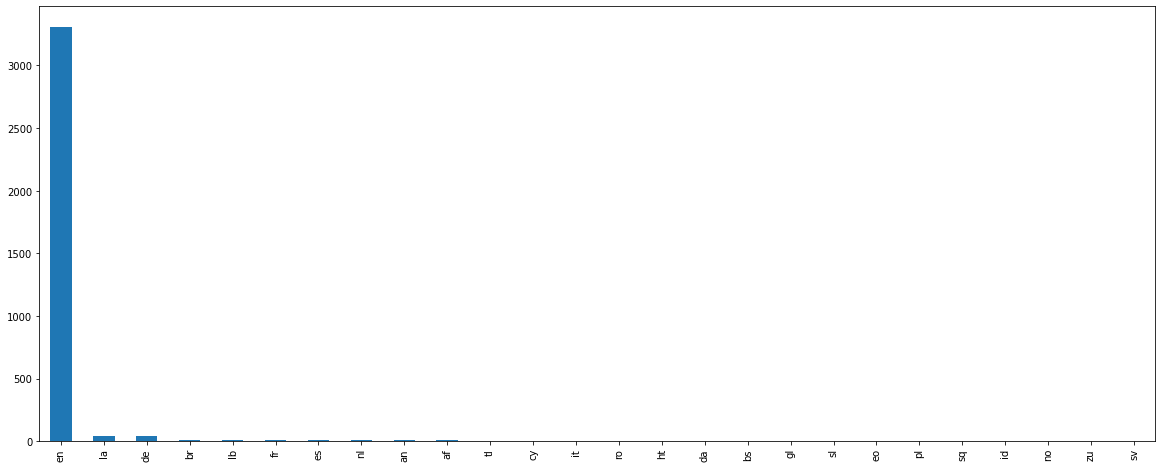

In [46]:
# viewing value counts for language column
imgpath_text_df['language'].value_counts().plot(kind='bar', figsize=(20,8))


For Note:



en    159
af      5
de      5
br      4
an      4
lb      4
es      3
la      2
fr      2
nl      2
cy      2
it      2
id      1
pl      1
sq      1
sl      1
gl      1
bs      1
eo      1
ro      1
Name: language, dtype: int64


For Form:



en    368
de     26
la     13
lb      7
an      5
br      4
nl      3
fr      3
no      1
es      1
zu      1
Name: language, dtype: int64


For Email:



en    592
la      2
tl      2
br      2
lb      1
nl      1
Name: language, dtype: int64


For Letter:



en    568
Name: language, dtype: int64


For News:



en    161
la     15
fr      3
cy      2
de      2
it      2
es      2
tl      1
br      1
Name: language, dtype: int64


For ADVE:



en    202
la      6
es      4
tl      3
nl      3
af      2
ht      2
da      2
br      2
ro      1
cy      1
fr      1
lb      1
it      1
Name: language, dtype: int64


For Memo:



en    620
de      1
Name: language, dtype: int64


For Resume:



en    120
de      1
Name: language, dtype: int64


For Scientific:



en    254
de      3
fr      2
af      1
sv      1
la      1
Name: language, dtype: int64


For Report:



en    262
la      3
de      1
Name: language, dtype: int64

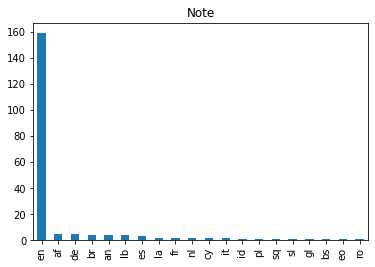

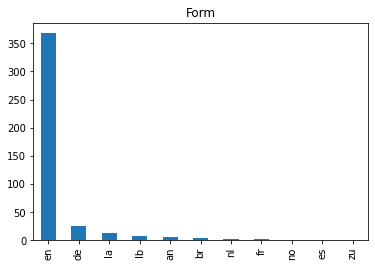

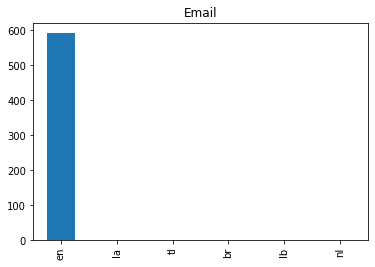

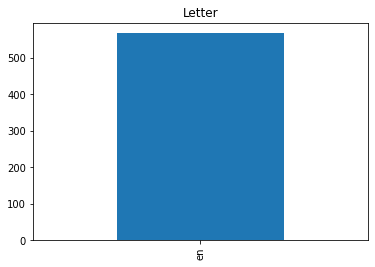

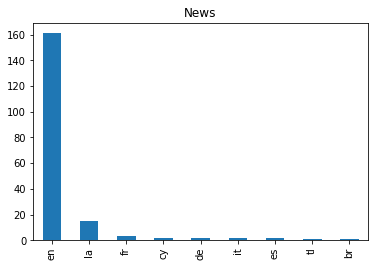

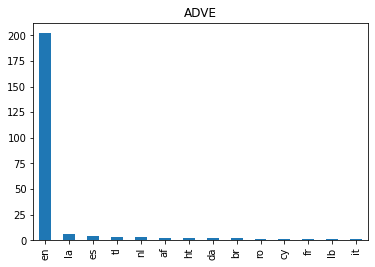

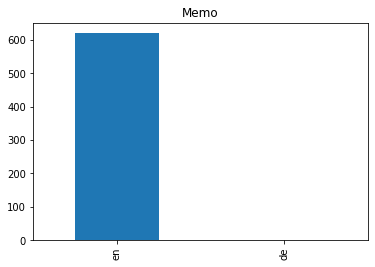

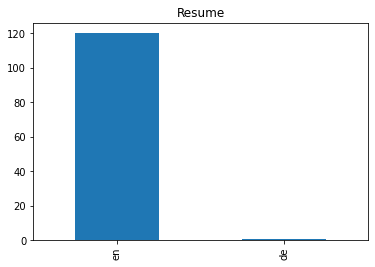

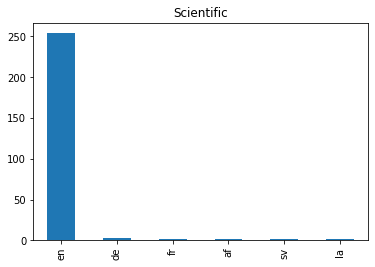

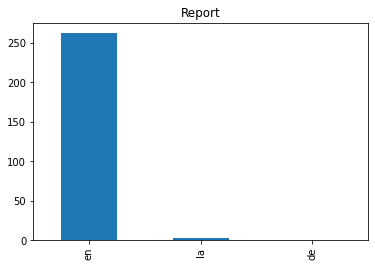

In [47]:
# viewing the distribution of languages for each label

for label in list(imgpath_text_df['label'].unique()):
  print('\nFor '+label+':\n')
  temp_df = imgpath_text_df[imgpath_text_df['label']==label]
  plt.figure()
  display(temp_df['language'].value_counts())
  temp_df['language'].value_counts().plot(kind='bar',title=label)

**Since the dataset contains mixed languages and there share is not significant, I will be removing those columns**

In [48]:
# filtering the dataset to get only images with english text
imgpath_text_df_en = imgpath_text_df[imgpath_text_df['language']=='en'].copy()

# viewing the first five rows
display(imgpath_text_df_en.head())

# confirming that the filtering was done properly
display(imgpath_text_df_en['language'].value_counts())

label                                             path  \
2  Note               /content/Dataset/Note/10384492.jpg   
3  Note               /content/Dataset/Note/71460901.jpg   
4  Note  /content/Dataset/Note/1003403894_1003403895.jpg   
6  Note             /content/Dataset/Note/0000007194.jpg   
8  Note             /content/Dataset/Note/2064984702.jpg   

                                                text  \
2   \n\n_ PPD AY pid Be\n\n7 Cane CO cirneten PP ...   
3  190242521\n\nPRODUC]\n\n \n\nED FROM\n\nB&W WE...   
4    \n\n \n\n \n\n \n\n  \n\nof .\n\nSLZESE STUP...   
6   \n\nCeol Cll\n\nSy [CCK boi\n\n10/9 JO5\nchan...   
8   \n\n \n\nPAULA DESEL\n{0-23.98\n\npy PE ayes\...   

                                          clean_text language  lang_prob  
2  ppd ay pid be cane co cirneten pp mae a pf e a...       en        1.0  
3  produc ed from b w web site the health policy ...       en        1.0  
4  of slzese stupts cover bu do faw froo o lavwel...       en        1.0  
6  ceol cll sy cck boi jo chance hos recordive ch...       en        1.0  
8  paula desel py pe ayes hate gst ee fxr upc lo ...       en        1.0

en    3306
Name: language, dtype: int64

##**Removing StopWords and Words less than 3 characters**

In [49]:
imgpath_text_df_en['clean_text_without_stopwords'] = [remove_stopwords(text) for text in imgpath_text_df_en['clean_text']]
imgpath_text_df_en['clean_text_without_stopwords'] = [re.sub(r'\b\w{1,3}\b', "",text) for text in imgpath_text_df_en['clean_text_without_stopwords']]
display(imgpath_text_df_en.head())

label                                             path  \
2  Note               /content/Dataset/Note/10384492.jpg   
3  Note               /content/Dataset/Note/71460901.jpg   
4  Note  /content/Dataset/Note/1003403894_1003403895.jpg   
6  Note             /content/Dataset/Note/0000007194.jpg   
8  Note             /content/Dataset/Note/2064984702.jpg   

                                                text  \
2   \n\n_ PPD AY pid Be\n\n7 Cane CO cirneten PP ...   
3  190242521\n\nPRODUC]\n\n \n\nED FROM\n\nB&W WE...   
4    \n\n \n\n \n\n \n\n  \n\nof .\n\nSLZESE STUP...   
6   \n\nCeol Cll\n\nSy [CCK boi\n\n10/9 JO5\nchan...   
8   \n\n \n\nPAULA DESEL\n{0-23.98\n\npy PE ayes\...   

                                          clean_text language  lang_prob  \
2  ppd ay pid be cane co cirneten pp mae a pf e a...       en        1.0   
3  produc ed from b w web site the health policy ...       en        1.0   
4  of slzese stupts cover bu do faw froo o lavwel...       en        1.0   
6  ceol cll sy cck boi jo chance hos recordive ch...       en        1.0   
8  paula desel py pe ayes hate gst ee fxr upc lo ...       en        1.0   

                        clean_text_without_stopwords  
2     cane cirneten      tharjen thew    dete   p...  
3  produc     site health policy center   batta g...  
4  slzese stupts cover   froo  lavwel    agase qe...  
6  ceol      chance  recordive  cork radel   seen...  
8  paula desel   ayes hate       clei  lonkvacts ...

##**Viewing the length of text**

###**Viewing collective statistics**

In [50]:
imgpath_text_df_en['text_length'] = [len(text) for text in imgpath_text_df_en['clean_text_without_stopwords']]
display(imgpath_text_df_en.head())

label                                             path  \
2  Note               /content/Dataset/Note/10384492.jpg   
3  Note               /content/Dataset/Note/71460901.jpg   
4  Note  /content/Dataset/Note/1003403894_1003403895.jpg   
6  Note             /content/Dataset/Note/0000007194.jpg   
8  Note             /content/Dataset/Note/2064984702.jpg   

                                                text  \
2   \n\n_ PPD AY pid Be\n\n7 Cane CO cirneten PP ...   
3  190242521\n\nPRODUC]\n\n \n\nED FROM\n\nB&W WE...   
4    \n\n \n\n \n\n \n\n  \n\nof .\n\nSLZESE STUP...   
6   \n\nCeol Cll\n\nSy [CCK boi\n\n10/9 JO5\nchan...   
8   \n\n \n\nPAULA DESEL\n{0-23.98\n\npy PE ayes\...   

                                          clean_text language  lang_prob  \
2  ppd ay pid be cane co cirneten pp mae a pf e a...       en        1.0   
3  produc ed from b w web site the health policy ...       en        1.0   
4  of slzese stupts cover bu do faw froo o lavwel...       en        1.0   
6  ceol cll sy cck boi jo chance hos recordive ch...       en        1.0   
8  paula desel py pe ayes hate gst ee fxr upc lo ...       en        1.0   

                        clean_text_without_stopwords  text_length  
2     cane cirneten      tharjen thew    dete   p...           86  
3  produc     site health policy center   batta g...          205  
4  slzese stupts cover   froo  lavwel    agase qe...          171  
6  ceol      chance  recordive  cork radel   seen...          333  
8  paula desel   ayes hate       clei  lonkvacts ...           96

count    3306.000000
mean      905.892317
std       816.255253
min         0.000000
25%       337.250000
50%       705.500000
75%      1196.000000
max      6271.000000
Name: text_length, dtype: float64

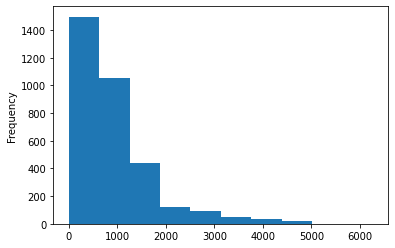

In [51]:
display(imgpath_text_df_en['text_length'].describe())
imgpath_text_df_en['text_length'].plot(kind='hist')

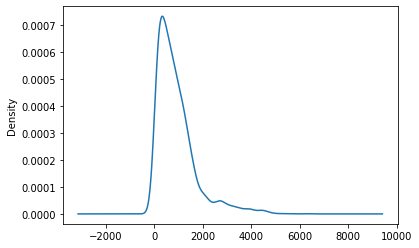

In [52]:
imgpath_text_df_en['text_length'].plot(kind='kde')

###**Viewing text length statistics for each label**

count     159.000000
mean      172.905660
std       244.198244
min         0.000000
25%        42.500000
50%        93.000000
75%       205.500000
max      1724.000000
Name: text_length, dtype: float64

count     368.000000
mean      616.739130
std       367.036341
min         0.000000
25%       342.500000
50%       555.500000
75%       805.750000
max      2685.000000
Name: text_length, dtype: float64

count     592.000000
mean      412.706081
std       338.499123
min         0.000000
25%       173.000000
50%       282.500000
75%       547.750000
max      1708.000000
Name: text_length, dtype: float64

count     568.000000
mean      889.491197
std       389.078321
min         0.000000
25%       597.000000
50%       839.000000
75%      1158.000000
max      2206.000000
Name: text_length, dtype: float64

count     161.000000
mean     2362.142857
std      1171.171245
min         0.000000
25%      1524.000000
50%      2361.000000
75%      3176.000000
max      6271.000000
Name: text_length, dtype: float64

count     202.000000
mean      396.178218
std       570.740741
min         0.000000
25%       113.000000
50%       188.500000
75%       427.000000
max      4546.000000
Name: text_length, dtype: float64

count     620.000000
mean      828.319355
std       415.828512
min         0.000000
25%       487.000000
50%       758.500000
75%      1137.250000
max      2333.000000
Name: text_length, dtype: float64

count     120.000000
mean     1927.541667
std       806.435615
min         0.000000
25%      1241.000000
50%      2027.000000
75%      2598.250000
max      3842.000000
Name: text_length, dtype: float64

count     254.000000
mean     1829.649606
std      1296.543410
min         0.000000
25%       776.250000
50%      1442.000000
75%      2870.250000
max      4837.000000
Name: text_length, dtype: float64

count     262.000000
mean     1224.992366
std       511.557175
min         0.000000
25%       898.750000
50%      1203.500000
75%      1502.750000
max      5340.000000
Name: text_length, dtype: float64

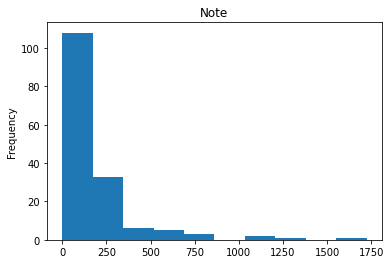

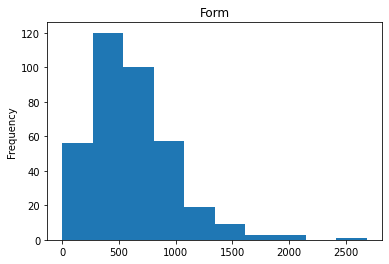

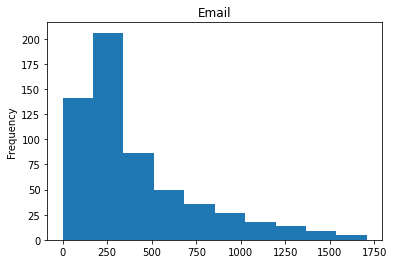

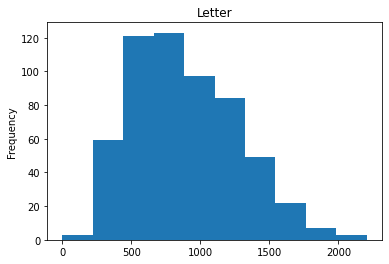

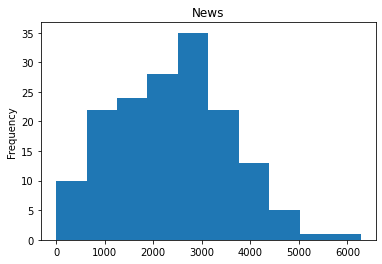

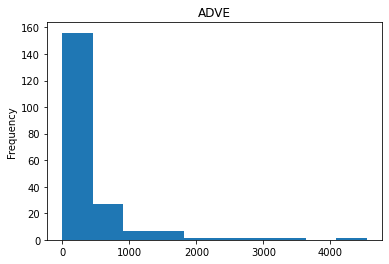

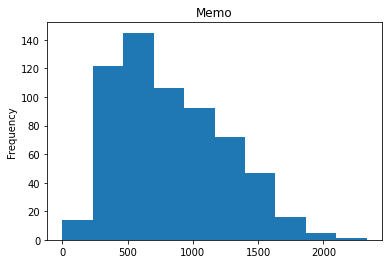

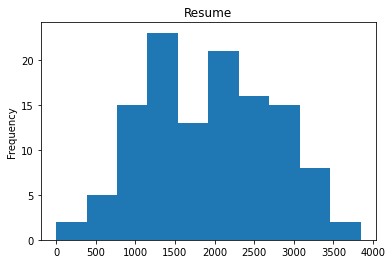

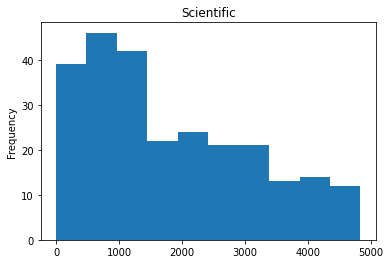

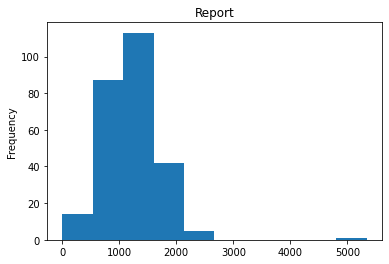

In [53]:
for label in list(imgpath_text_df_en['label'].unique()):
  temp_df = imgpath_text_df_en[imgpath_text_df_en['label']==label]
  print('\n')
  display(temp_df['text_length'].describe())
  plt.figure()
  temp_df['text_length'].plot(kind='hist',title=label)

###**Getting maximum and minimum text length for each label**

####**Maximum text length**

text_length
label                  
ADVE               4546
Email              1708
Form               2685
Letter             2206
Memo               2333
News               6271
Note               1724
Report             5340
Resume             3842
Scientific         4837

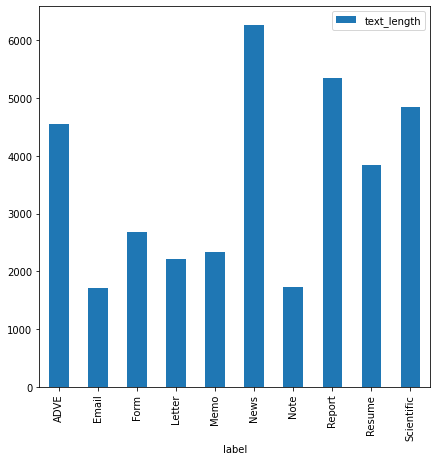

In [54]:
# grouping by and plotting maximum text length for each type of image
df_tl_temp = imgpath_text_df_en[['label','text_length']]
t = df_tl_temp.groupby('label').agg('max')
display(t)
t.plot(kind='bar',figsize=(7,7))

text_length
label                  
ADVE                 14
Email                16
Form                 38
Letter              149
Memo                  4
News                 40
Note                  2
Report              369
Resume              230
Scientific          103

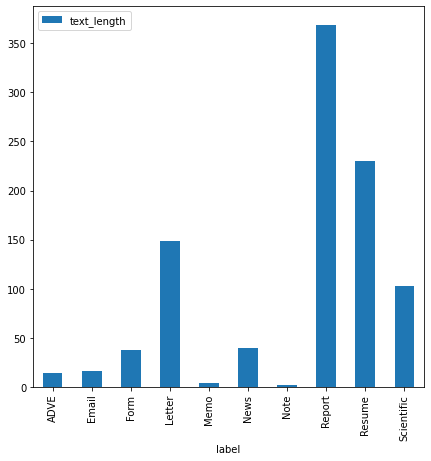

In [55]:
# grouping by and plotting minimum text length for each type of image
df_tl_temp = imgpath_text_df_en[['label','text_length']][imgpath_text_df_en['text_length']!=0]
t = df_tl_temp.groupby('label').agg('min')
display(t)
t.plot(kind='bar',figsize=(7,7))

##**Generating Word Clouds**

###**Generating collective word cloud**

In [56]:
# Defining a function to plot word cloud
def wordcloud_plot_c(wordcloud):
  # Set figure size
  plt.figure(figsize=(10, 10))
  # Display image
  plt.imshow(wordcloud) 
  # No axis details
  plt.axis("off");

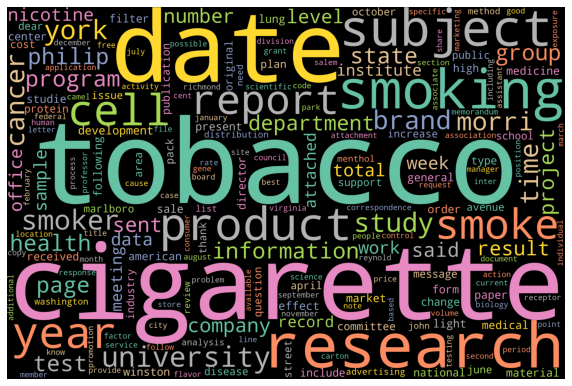

In [57]:
wordcloud_text_all = " ".join(imgpath_text_df_en['clean_text_without_stopwords'])
wordcloud_all = WordCloud(width = 3000,
                      height = 2000,
                      random_state=1,
                      background_color='black',
                      colormap='Set2',
                      collocations=False,
                      stopwords = STOPWORDS).generate(wordcloud_text_all)
# Plotting the word cloud
wordcloud_plot_c(wordcloud_all)

###**Generating Word Cloud for each label**

In [58]:
# creating list of labels for creating wordcloud in iterations for each label
labels = list(imgpath_text_df_en['label'].unique())
display(labels)

['Note',
 'Form',
 'Email',
 'Letter',
 'News',
 'ADVE',
 'Memo',
 'Resume',
 'Scientific',
 'Report']

In [59]:
# Defining a function to plot word cloud
def wordcloud_plot(wordcloud,label):
  # Set figure size
  plt.figure(figsize=(10, 10))
  plt.title('For '+label+':')
  # Display image
  plt.imshow(wordcloud)
  # No axis details
  plt.axis("off");

  0%|          | 0/10 [00:00<?, ?it/s]

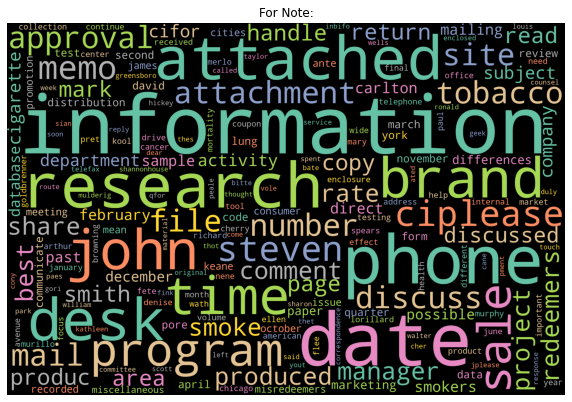

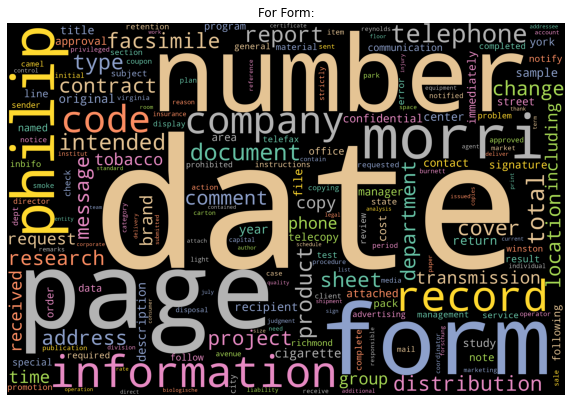

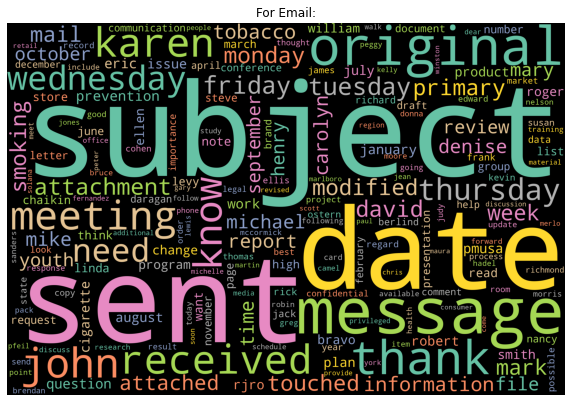

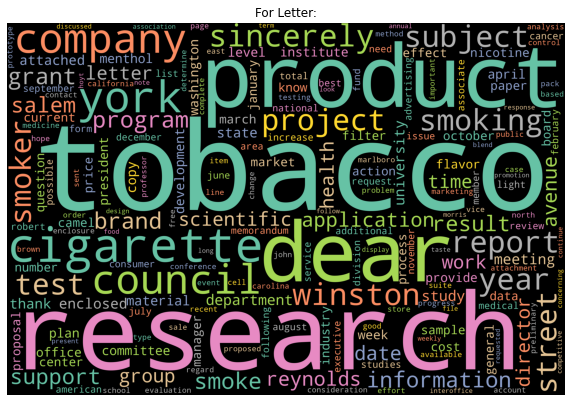

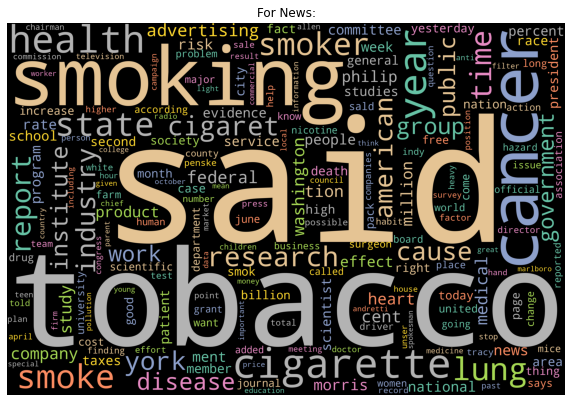

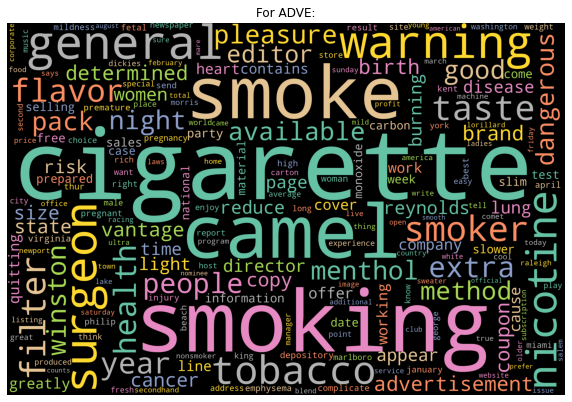

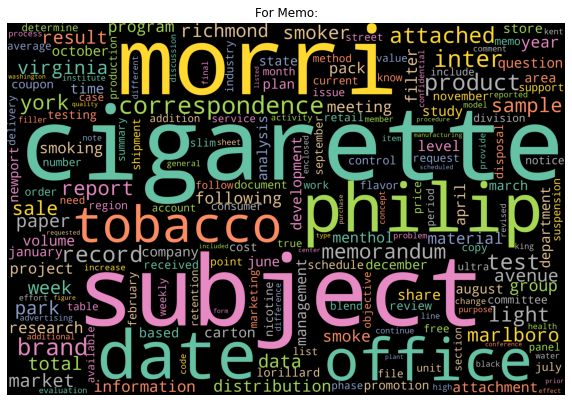

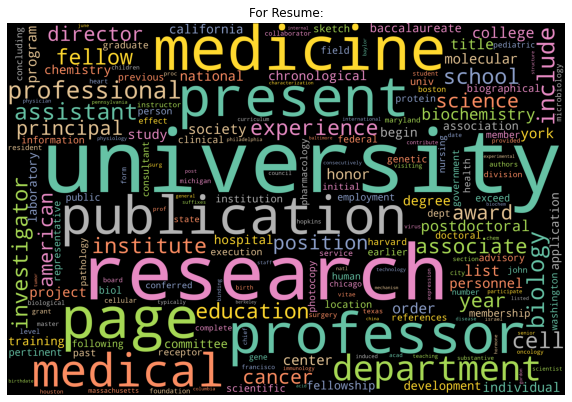

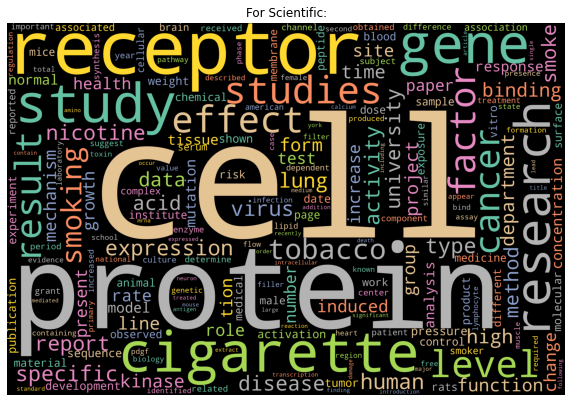

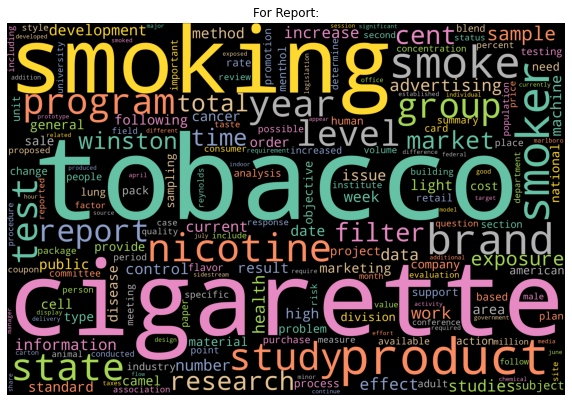

In [60]:
for label in tqdm(labels):
  wordcloud_text = " ".join(imgpath_text_df_en[imgpath_text_df_en['label']==label]['clean_text_without_stopwords'])
  wordcloud = WordCloud(width = 3000,
                        height = 2000,
                        random_state=1,
                        background_color='black',
                        colormap='Set2',
                        collocations=False,
                        stopwords = STOPWORDS).generate(wordcloud_text)
  # Plotting the word cloud
  wordcloud_plot(wordcloud,label)

##**Checking the Frequency Distribution of Words**

###**Checking the Collective Frequency Distribution of Words**

In [61]:
from nltk.tokenize import word_tokenize
all_text = ' '.join(imgpath_text_df_en['clean_text_without_stopwords'])
token_all = word_tokenize(all_text)
display(token_all)

['cane',
 'cirneten',
 'tharjen',
 'thew',
 'dete',
 'plane',
 'atrsd',
 'phone',
 'atechutr',
 'asfrneto',
 'produc',
 'site',
 'health',
 'policy',
 'center',
 'batta',
 'gori',
 'barr',
 'road',
 'bethesda',
 'telephone',
 'telefax',
 'mail',
 'gorigb',
 'date',
 'time',
 'mark',
 'smith',
 'greetings',
 'mark',
 'thoughts',
 'proposal',
 'touch',
 'base',
 'sharon',
 'regards',
 'gori',
 'page',
 'pages',
 'page',
 'slzese',
 'stupts',
 'cover',
 'froo',
 'lavwel',
 'agase',
 'qeesse',
 'coven',
 'detee',
 'fist',
 'suce',
 'areow',
 'lanse',
 'pended',
 'fated',
 'frese',
 'woud',
 'mene',
 'prrs',
 'oees',
 'deer',
 'tiald',
 'waldo',
 'fect',
 'ceol',
 'chance',
 'recordive',
 'cork',
 'radel',
 'seen',
 'stout',
 'ofau',
 'untuerer',
 'kivd',
 'bechon',
 'webs',
 'laws',
 'heawe',
 'vebt',
 'adwint',
 'ster',
 'gerace',
 'mele',
 'budten',
 'cock',
 'lunos',
 'bled',
 'sage',
 'geek',
 'mack',
 'nuclear',
 'ghoelny',
 'research',
 'gontee',
 'suber',
 'thet',
 'shackle',
 'geek

In [62]:
fdist = FreqDist(token_all)
display(fdist)

FreqDist({'cane': 13,
          'cirneten': 1,
          'tharjen': 1,
          'thew': 1,
          'dete': 5,
          'plane': 4,
          'atrsd': 1,
          'phone': 177,
          'atechutr': 1,
          'asfrneto': 1,
          'produc': 37,
          'site': 166,
          'health': 772,
          'policy': 120,
          'center': 401,
          'batta': 1,
          'gori': 12,
          'barr': 9,
          'road': 73,
          'bethesda': 30,
          'telephone': 194,
          'telefax': 53,
          'mail': 234,
          'gorigb': 1,
          'date': 1762,
          'time': 650,
          'mark': 172,
          'smith': 158,
          'greetings': 5,
          'thoughts': 24,
          'proposal': 165,
          'touch': 26,
          'base': 100,
          'sharon': 26,
          'regards': 101,
          'page': 475,
          'pages': 284,
          'slzese': 1,
          'stupts': 1,
          'cover': 165,
          'froo': 1,
          'lavwel': 1,
     

In [75]:
# To find the frequency of top 20 words
fdist_top_20 = fdist.most_common(20)
display(fdist_top_20)

[('tobacco', 2278),
 ('date', 1762),
 ('research', 1686),
 ('smoking', 1540),
 ('subject', 1393),
 ('cigarette', 1178),
 ('smoke', 968),
 ('university', 967),
 ('cigarettes', 873),
 ('study', 860),
 ('york', 859),
 ('report', 811),
 ('morris', 795),
 ('cancer', 795),
 ('health', 772),
 ('philip', 765),
 ('information', 759),
 ('product', 756),
 ('smokers', 747),
 ('sent', 707)]

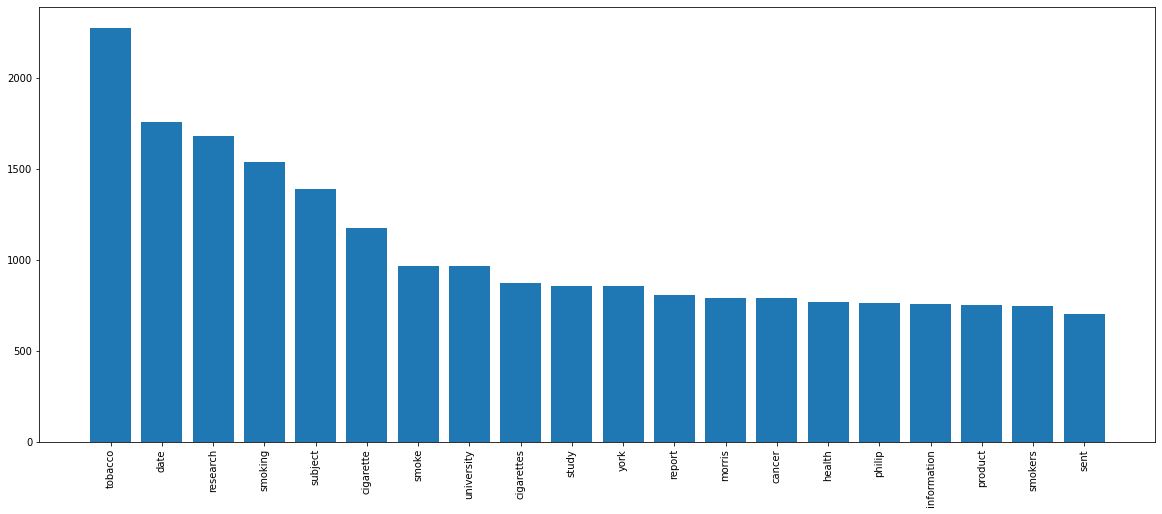

In [76]:
plt.figure(figsize=(20,8))
plt.bar(*zip(*fdist_top_20))
plt.xticks(rotation=90)
plt.show()

###**Checking the Frequency Distribution of Words for Each Label**

In [77]:
for label in labels:
  temp_text = ' '.join(imgpath_text_df_en[imgpath_text_df_en['label']==label]['clean_text_without_stopwords'])
  temp_tokens = word_tokenize(temp_text)
  print('All Tokens and their Frequencies For '+label+':\n')
  display(temp_tokens)
  fdist_temp = FreqDist(temp_tokens)
  display(fdist_temp)

All Tokens and their Frequencies For Note:



['cane',
 'cirneten',
 'tharjen',
 'thew',
 'dete',
 'plane',
 'atrsd',
 'phone',
 'atechutr',
 'asfrneto',
 'produc',
 'site',
 'health',
 'policy',
 'center',
 'batta',
 'gori',
 'barr',
 'road',
 'bethesda',
 'telephone',
 'telefax',
 'mail',
 'gorigb',
 'date',
 'time',
 'mark',
 'smith',
 'greetings',
 'mark',
 'thoughts',
 'proposal',
 'touch',
 'base',
 'sharon',
 'regards',
 'gori',
 'page',
 'pages',
 'page',
 'slzese',
 'stupts',
 'cover',
 'froo',
 'lavwel',
 'agase',
 'qeesse',
 'coven',
 'detee',
 'fist',
 'suce',
 'areow',
 'lanse',
 'pended',
 'fated',
 'frese',
 'woud',
 'mene',
 'prrs',
 'oees',
 'deer',
 'tiald',
 'waldo',
 'fect',
 'ceol',
 'chance',
 'recordive',
 'cork',
 'radel',
 'seen',
 'stout',
 'ofau',
 'untuerer',
 'kivd',
 'bechon',
 'webs',
 'laws',
 'heawe',
 'vebt',
 'adwint',
 'ster',
 'gerace',
 'mele',
 'budten',
 'cock',
 'lunos',
 'bled',
 'sage',
 'geek',
 'mack',
 'nuclear',
 'ghoelny',
 'research',
 'gontee',
 'suber',
 'thet',
 'shackle',
 'geek

FreqDist({'cane': 2,
          'cirneten': 1,
          'tharjen': 1,
          'thew': 1,
          'dete': 1,
          'plane': 1,
          'atrsd': 1,
          'phone': 15,
          'atechutr': 1,
          'asfrneto': 1,
          'produc': 5,
          'site': 6,
          'health': 3,
          'policy': 1,
          'center': 3,
          'batta': 1,
          'gori': 2,
          'barr': 1,
          'road': 1,
          'bethesda': 1,
          'telephone': 3,
          'telefax': 2,
          'mail': 6,
          'gorigb': 1,
          'date': 16,
          'time': 8,
          'mark': 5,
          'smith': 5,
          'greetings': 1,
          'thoughts': 1,
          'proposal': 1,
          'touch': 2,
          'base': 1,
          'sharon': 2,
          'regards': 1,
          'page': 4,
          'pages': 1,
          'slzese': 1,
          'stupts': 1,
          'cover': 1,
          'froo': 1,
          'lavwel': 1,
          'agase': 1,
          'qeesse': 1,
  

All Tokens and their Frequencies For Form:



['inbifo',
 'institut',
 'biologische',
 'forschung',
 'gmbh',
 'contract',
 'research',
 'telephone',
 'telefax',
 'inbifo',
 'gmbh',
 'fuggerstr',
 'cologne',
 'germany',
 'hisirw',
 'watk',
 'philip',
 'morris',
 'richmond',
 'hans',
 'jiirgen',
 'haubmann',
 'date',
 'total',
 'number',
 'pages',
 'telefax',
 'message',
 'urgent',
 'cofor',
 'review',
 'comment',
 'reply',
 'information',
 'xafaxicoverpaginixon',
 'trade',
 'register',
 'cologne',
 'general',
 'manager',
 'wolf',
 'reininghaus',
 'ezbzorsosz',
 'form',
 'philip',
 'morris',
 'tineorporated',
 'date',
 'invention',
 'record',
 'patent',
 'counsel',
 'richmond',
 'following',
 'background',
 'information',
 'additional',
 'details',
 'submitted',
 'concerning',
 'vention',
 'described',
 'supplement',
 'earlier',
 'preliminary',
 'disclosure',
 'form',
 'descriptive',
 'title',
 'summary',
 'teen',
 'disclosure',
 'specify',
 'written',
 'oral',
 'ernle',
 'sama',
 'bambsek',
 'inge',
 'practice',
 'invention',
 'lab

FreqDist({'inbifo': 38,
          'institut': 25,
          'biologische': 20,
          'forschung': 22,
          'gmbh': 18,
          'contract': 69,
          'research': 72,
          'telephone': 114,
          'telefax': 39,
          'fuggerstr': 3,
          'cologne': 10,
          'germany': 4,
          'hisirw': 1,
          'watk': 1,
          'philip': 147,
          'morris': 155,
          'richmond': 39,
          'hans': 3,
          'jiirgen': 1,
          'haubmann': 1,
          'date': 462,
          'total': 103,
          'number': 184,
          'pages': 120,
          'message': 70,
          'urgent': 4,
          'cofor': 1,
          'review': 37,
          'comment': 14,
          'reply': 9,
          'information': 147,
          'xafaxicoverpaginixon': 1,
          'trade': 17,
          'register': 6,
          'general': 38,
          'manager': 51,
          'wolf': 8,
          'reininghaus': 13,
          'ezbzorsosz': 1,
          'form': 151,


All Tokens and their Frequencies For Email:



['original',
 'message',
 'yates',
 'margaret',
 'sent',
 'thursday',
 'february',
 'qamar',
 'aamir',
 'subject',
 'cambridge',
 'trial',
 'offers',
 'aamir',
 'glad',
 'tooth',
 'better',
 'quickly',
 'come',
 'recommendation',
 'best',
 'dial',
 'trial',
 'offers',
 'cambridge',
 'focus',
 'offensive',
 'need',
 'loop',
 'rahul',
 'optimizing',
 'offers',
 'redemption',
 'rates',
 'based',
 'basic',
 'learning',
 'minute',
 'thing',
 'april',
 'mailing',
 'need',
 'quickly',
 'review',
 'tomorrow',
 'finalize',
 'brand',
 'monday',
 'thanks',
 'margaret',
 'zeperns',
 'immense',
 'original',
 'message',
 'merlo',
 'ellen',
 'sent',
 'friday',
 'october',
 'laufer',
 'david',
 'daragan',
 'karen',
 'fisher',
 'scott',
 'scruggs',
 'john',
 'turner',
 'henry',
 'pfeil',
 'michael',
 'wilson',
 'gregory',
 'pmusa',
 'subject',
 'tool',
 'tobacco',
 'enforcement',
 'youth',
 'smoking',
 'surveys',
 'mike',
 'pfeil',
 'greg',
 'wilson',
 'represent',
 'pmusa',
 'thanks',
 'woodson',
 'be

FreqDist({'original': 244,
          'message': 279,
          'yates': 2,
          'margaret': 5,
          'sent': 565,
          'thursday': 105,
          'february': 41,
          'qamar': 1,
          'aamir': 2,
          'subject': 636,
          'cambridge': 4,
          'trial': 14,
          'offers': 4,
          'glad': 3,
          'tooth': 1,
          'better': 8,
          'quickly': 5,
          'come': 16,
          'recommendation': 6,
          'best': 34,
          'dial': 7,
          'focus': 9,
          'offensive': 1,
          'need': 95,
          'loop': 8,
          'rahul': 1,
          'optimizing': 1,
          'redemption': 4,
          'rates': 4,
          'based': 21,
          'basic': 5,
          'learning': 1,
          'minute': 4,
          'thing': 8,
          'april': 41,
          'mailing': 7,
          'review': 64,
          'tomorrow': 21,
          'finalize': 4,
          'brand': 31,
          'monday': 99,
          'thanks': 155

All Tokens and their Frequencies For Letter:



['jerry',
 'lawson',
 'swicegood',
 'weekly',
 'highlights',
 'date',
 'january',
 'menthol',
 'development',
 'marumerized',
 'status',
 'menthol',
 'prototype',
 'useing',
 'apcc',
 'replacement',
 'alumina',
 'received',
 'good',
 'reviews',
 'informal',
 'taste',
 'panels',
 'performed',
 'better',
 'analyticals',
 'control',
 'apcc',
 'marumerized',
 'menthol',
 'substrate',
 'adding',
 'menthol',
 'directly',
 'alcohol',
 'dilution',
 'making',
 'process',
 'simple',
 'heat',
 'source',
 'having',
 'turkish',
 'tobacco',
 'complimented',
 'overall',
 'taste',
 'significance',
 'improved',
 'menthol',
 'product',
 'alumina',
 'feasible',
 'step',
 'investigate',
 'carbon',
 'alumina',
 'replacement',
 'marumerized',
 'menthol',
 'substrate',
 'menthol',
 'development',
 'paper',
 'substrate',
 'status',
 'tobacco',
 'extracts',
 'nicotine',
 'impact',
 'tobacco',
 'taste',
 'evaluated',
 'menthol',
 'product',
 'uses',
 'plug',
 'menthol',
 'delivery',
 'extracts',
 'evaluated',
 

FreqDist({'jerry': 5,
          'lawson': 4,
          'swicegood': 1,
          'weekly': 50,
          'highlights': 26,
          'date': 141,
          'january': 81,
          'menthol': 108,
          'development': 104,
          'marumerized': 3,
          'status': 44,
          'prototype': 30,
          'useing': 1,
          'apcc': 2,
          'replacement': 10,
          'alumina': 8,
          'received': 45,
          'good': 48,
          'reviews': 1,
          'informal': 7,
          'taste': 47,
          'panels': 3,
          'performed': 13,
          'better': 21,
          'analyticals': 3,
          'control': 44,
          'substrate': 18,
          'adding': 4,
          'directly': 16,
          'alcohol': 9,
          'dilution': 11,
          'making': 20,
          'process': 83,
          'simple': 5,
          'heat': 14,
          'source': 19,
          'having': 20,
          'turkish': 4,
          'tobacco': 697,
          'complimented': 1,
   

All Tokens and their Frequencies For News:



['brenton',
 'herald',
 'bragenton',
 'circ',
 'nensprper',
 'motorsports',
 'writer',
 'milwaukee',
 'mercedes',
 'benz',
 'roger',
 'penske',
 'drivers',
 'time',
 'marlboro',
 'team',
 'auto',
 'penske',
 'raced',
 'facing',
 'indianapolis',
 'winner',
 'unser',
 'fought',
 'emerson',
 'fittipaldi',
 'genuine',
 'draft',
 'waukee',
 'mile',
 'paul',
 'tracy',
 'penske',
 'hind',
 'event',
 'stopped',
 'laps',
 'short',
 'thing',
 'roger',
 'said',
 'unser',
 'said',
 'wide',
 'grin',
 'straight',
 'victory',
 'ning',
 'previous',
 'event',
 'phoenix',
 'fourth',
 'team',
 'penske',
 'records',
 'unser',
 'standings',
 'points',
 'followed',
 'fittipaldi',
 'week',
 'earlier',
 'unser',
 'fitti',
 'credit',
 'going',
 'perpowered',
 'mercedes',
 'engines',
 'owner',
 'roger',
 'penske',
 'built',
 'auto',
 'club',
 'rules',
 'conventional',
 'indy',
 'sleek',
 'doubt',
 'class',
 'field',
 'sunday',
 'teammates',
 'definitely',
 'advan',
 'tage',
 'said',
 'unser',
 'season',
 'drivi

FreqDist({'brenton': 1,
          'herald': 15,
          'bragenton': 1,
          'circ': 2,
          'nensprper': 1,
          'motorsports': 2,
          'writer': 14,
          'milwaukee': 7,
          'mercedes': 9,
          'benz': 2,
          'roger': 6,
          'penske': 30,
          'drivers': 10,
          'time': 100,
          'marlboro': 26,
          'team': 41,
          'auto': 10,
          'raced': 1,
          'facing': 4,
          'indianapolis': 11,
          'winner': 16,
          'unser': 35,
          'fought': 4,
          'emerson': 8,
          'fittipaldi': 24,
          'genuine': 3,
          'draft': 7,
          'waukee': 1,
          'mile': 15,
          'paul': 13,
          'tracy': 40,
          'hind': 1,
          'event': 10,
          'stopped': 8,
          'laps': 9,
          'short': 7,
          'thing': 27,
          'said': 568,
          'wide': 16,
          'grin': 3,
          'straight': 5,
          'victory': 16,
        

All Tokens and their Frequencies For ADVE:



['gbnoi',
 'adoouyie',
 'jose',
 'exner',
 'cmrcaaine',
 'vetson',
 'bact',
 'aanuarn',
 'surgeon',
 'general',
 'warning',
 'smoking',
 'causes',
 'lung',
 'cancer',
 'heart',
 'disease',
 'emphysema',
 'complicate',
 'pregnancy',
 'produced',
 'site',
 'reed',
 'wiis',
 'presents',
 'ncaa',
 'basketball',
 'championship',
 'scoreboard',
 'follow',
 'basketball',
 'classic',
 'finish',
 'scores',
 'round',
 'final',
 'game',
 'wecom',
 'camel',
 'filters',
 'surprisingly',
 'smooth',
 'oanee',
 'filters',
 'fleet',
 'footed',
 'george',
 'case',
 'leading',
 'base',
 'stealer',
 'major',
 'leagues',
 'smokes',
 'slower',
 'burning',
 'cigarette',
 'camel',
 'forge',
 'case',
 'dimaggio',
 'bucky',
 'walcers',
 'johnny',
 'mize',
 'aighters',
 'ameri',
 'favorite',
 'sport',
 'prefer',
 'america',
 'favorite',
 'cigarette',
 'camel',
 'george',
 'case',
 'tells',
 'experiences',
 'experience',
 'convince',
 'pleasure',
 'smoking',
 'cigarette',
 'slow',
 'burhing',
 'costlier',
 'bacco

FreqDist({'gbnoi': 1,
          'adoouyie': 1,
          'jose': 2,
          'exner': 1,
          'cmrcaaine': 1,
          'vetson': 1,
          'bact': 1,
          'aanuarn': 1,
          'surgeon': 75,
          'general': 78,
          'warning': 76,
          'smoking': 113,
          'causes': 14,
          'lung': 16,
          'cancer': 18,
          'heart': 15,
          'disease': 15,
          'emphysema': 11,
          'complicate': 11,
          'pregnancy': 10,
          'produced': 9,
          'site': 10,
          'reed': 1,
          'wiis': 1,
          'presents': 3,
          'ncaa': 1,
          'basketball': 2,
          'championship': 3,
          'scoreboard': 1,
          'follow': 3,
          'classic': 1,
          'finish': 1,
          'scores': 1,
          'round': 5,
          'final': 1,
          'game': 2,
          'wecom': 1,
          'camel': 36,
          'filters': 6,
          'surprisingly': 1,
          'smooth': 6,
          'oanee':

All Tokens and their Frequencies For Memo:



['philip',
 'morris',
 'management',
 'corp',
 'inter',
 'office',
 'correspondence',
 'park',
 'avenue',
 'york',
 'distribution',
 'date',
 'anne',
 'okoniewski',
 'final',
 'iris',
 'priority',
 'list',
 'result',
 'input',
 'attached',
 'final',
 'list',
 'country',
 'priorities',
 'iris',
 'project',
 'list',
 'reviewed',
 'agreed',
 'conference',
 'april',
 'questions',
 'know',
 'attachment',
 'distribution',
 'becker',
 'berlind',
 'friedman',
 'goodheart',
 'tyler',
 'whidden',
 'windholz',
 'winokur',
 'scientific',
 'affairs',
 'difrancesco',
 'henderson',
 'scientific',
 'affairs',
 'confer',
 'drumwright',
 'mcalpin',
 'date',
 'customer',
 'service',
 'lynne',
 'parks',
 'subject',
 'philip',
 'morris',
 'enclosed',
 'cartridge',
 'containing',
 'information',
 'floppy',
 'disk',
 'enclosed',
 'containing',
 'names',
 'addresses',
 'completed',
 'distributed',
 'enclosed',
 'unreadable',
 'delivered',
 'blake',
 'godard',
 'thank',
 'lynne',
 'parks',
 'deepwater',
 'term

FreqDist({'philip': 446,
          'morris': 444,
          'management': 133,
          'corp': 22,
          'inter': 282,
          'office': 321,
          'correspondence': 308,
          'park': 185,
          'avenue': 170,
          'york': 219,
          'distribution': 165,
          'date': 419,
          'anne': 7,
          'okoniewski': 1,
          'final': 52,
          'iris': 2,
          'priority': 10,
          'list': 49,
          'result': 33,
          'input': 13,
          'attached': 255,
          'country': 16,
          'priorities': 1,
          'project': 121,
          'reviewed': 29,
          'agreed': 25,
          'conference': 42,
          'april': 126,
          'questions': 90,
          'know': 67,
          'attachment': 86,
          'becker': 1,
          'berlind': 3,
          'friedman': 1,
          'goodheart': 1,
          'tyler': 2,
          'whidden': 5,
          'windholz': 2,
          'winokur': 4,
          'scientific': 16,


All Tokens and their Frequencies For Resume:



['prnicipal',
 'investigator',
 'program',
 'director',
 'frst',
 'odie',
 'sueoka',
 'noboru',
 'biographical',
 'sketch',
 'following',
 'information',
 'personnel',
 'consultants',
 'collaborators',
 'segin',
 'orincipa',
 'investigator',
 'program',
 'director',
 'photocopy',
 'page',
 'person',
 'position',
 'title',
 'risa',
 'ohkawa',
 'doctoral',
 'candidate',
 'year',
 'graduate',
 'studert',
 'education',
 'begin',
 'saccalaureate',
 'initial',
 'protessiona',
 'educavon',
 'sucn',
 'qursing',
 'include',
 'postdoctoral',
 'raining',
 'year',
 'institution',
 'location',
 'degree',
 'conferred',
 'field',
 'study',
 'pees',
 'apes',
 'massachusetts',
 'institute',
 'technology',
 'cambridge',
 'life',
 'sciences',
 'research',
 'professional',
 'experience',
 'concluding',
 'present',
 'pasition',
 'list',
 'cnrcnological',
 'order',
 'previous',
 'employment',
 'expererce',
 'honors',
 'personnat',
 'inciude',
 'principal',
 'investigator',
 'individuals',
 'participate',
 '

FreqDist({'prnicipal': 1,
          'investigator': 150,
          'program': 100,
          'director': 131,
          'frst': 2,
          'odie': 1,
          'sueoka': 1,
          'noboru': 1,
          'biographical': 71,
          'sketch': 70,
          'following': 60,
          'information': 58,
          'personnel': 99,
          'consultants': 44,
          'collaborators': 31,
          'segin': 2,
          'orincipa': 1,
          'photocopy': 52,
          'page': 160,
          'person': 55,
          'position': 112,
          'title': 68,
          'risa': 1,
          'ohkawa': 1,
          'doctoral': 51,
          'candidate': 5,
          'year': 62,
          'graduate': 53,
          'studert': 1,
          'education': 149,
          'begin': 89,
          'saccalaureate': 1,
          'initial': 48,
          'protessiona': 1,
          'educavon': 1,
          'sucn': 3,
          'qursing': 1,
          'include': 188,
          'postdoctoral': 123,
     

All Tokens and their Frequencies For Scientific:



['role',
 'myosin',
 'light',
 'chain',
 'phosphorylation',
 'endothelial',
 'cell',
 'retraction',
 'rebecca',
 'sheldon',
 'alan',
 'kathy',
 'lindsley',
 'sandra',
 'shasby',
 'michael',
 'shasby',
 'department',
 'medicine',
 'university',
 'iowa',
 'college',
 'medicine',
 'veterans',
 'administration',
 'hospital',
 'iowa',
 'city',
 'lowa',
 'sheldon',
 'rebecca',
 'alan',
 'kathy',
 'lindsley',
 'sandra',
 'shasby',
 'michael',
 'shasby',
 'role',
 'myosin',
 'light',
 'chain',
 'phosphorylation',
 'endothelial',
 'cell',
 'retraction',
 'physiol',
 'lung',
 'cell',
 'physiol',
 'endothelial',
 'cells',
 'retract',
 'centripetally',
 'exposed',
 'histamine',
 'extracellular',
 'calcium',
 'chelated',
 'tripetal',
 'retraction',
 'implies',
 'centripetal',
 'tension',
 'expressed',
 'cells',
 'asked',
 'phosphorylation',
 'light',
 'chain',
 'myosin',
 'important',
 'retraction',
 'occur',
 'inference',
 'expression',
 'tension',
 'human',
 'umbilical',
 'vein',
 'endothelial',


FreqDist({'role': 75,
          'myosin': 10,
          'light': 18,
          'chain': 19,
          'phosphorylation': 26,
          'endothelial': 27,
          'cell': 313,
          'retraction': 9,
          'rebecca': 3,
          'sheldon': 2,
          'alan': 9,
          'kathy': 2,
          'lindsley': 3,
          'sandra': 3,
          'shasby': 4,
          'michael': 12,
          'department': 83,
          'medicine': 66,
          'university': 113,
          'iowa': 4,
          'college': 29,
          'veterans': 10,
          'administration': 31,
          'hospital': 20,
          'city': 19,
          'lowa': 5,
          'physiol': 7,
          'lung': 110,
          'cells': 418,
          'retract': 1,
          'centripetally': 1,
          'exposed': 23,
          'histamine': 11,
          'extracellular': 10,
          'calcium': 42,
          'chelated': 1,
          'tripetal': 1,
          'implies': 3,
          'centripetal': 4,
          'tension

All Tokens and their Frequencies For Report:



['thoughts',
 'like',
 'keeping',
 'quiet',
 'ewing',
 'stuff',
 'veiled',
 'reference',
 'general',
 'accounting',
 'office',
 'continuing',
 'investigations',
 'actions',
 'proposed',
 'tobacco',
 'regulation',
 'investigations',
 'focus',
 'appropriated',
 'money',
 'funds',
 'redirected',
 'congressionally',
 'mandated',
 'functions',
 'internal',
 'process',
 'come',
 'regulations',
 'continues',
 'stonewall',
 'legitimate',
 'congressional',
 'requests',
 'information',
 'faces',
 'possibility',
 'additional',
 'actions',
 'assist',
 'deal',
 'state',
 'folks',
 'money',
 'given',
 'goal',
 'sure',
 'program',
 'continue',
 'current',
 'funding',
 'expires',
 'appropriations',
 'like',
 'working',
 'congressional',
 'offices',
 'accounting',
 'exactly',
 'money',
 'resources',
 'regulate',
 'control',
 'tobacco',
 'federal',
 'level',
 'intent',
 'highlight',
 'programs',
 'duplicative',
 'work',
 'zero',
 'reduce',
 'funding',
 'possible',
 'leer',
 'title',
 'research',
 'proje

FreqDist({'thoughts': 1,
          'like': 28,
          'keeping': 2,
          'quiet': 3,
          'ewing': 1,
          'stuff': 2,
          'veiled': 1,
          'reference': 24,
          'general': 61,
          'accounting': 2,
          'office': 25,
          'continuing': 2,
          'investigations': 10,
          'actions': 4,
          'proposed': 36,
          'tobacco': 402,
          'regulation': 15,
          'focus': 20,
          'appropriated': 1,
          'money': 8,
          'funds': 8,
          'redirected': 1,
          'congressionally': 1,
          'mandated': 1,
          'functions': 11,
          'internal': 4,
          'process': 49,
          'come': 5,
          'regulations': 8,
          'continues': 5,
          'stonewall': 1,
          'legitimate': 2,
          'congressional': 7,
          'requests': 6,
          'information': 78,
          'faces': 1,
          'possibility': 7,
          'additional': 30,
          'assist': 11,
   

In [78]:
for label in labels:
  temp_text = ' '.join(imgpath_text_df_en[imgpath_text_df_en['label']==label]['clean_text_without_stopwords'])
  temp_tokens = word_tokenize(temp_text)
  fdist_temp = FreqDist(temp_tokens)
  fdist_top_20_temp = fdist_temp.most_common(20)
  print('Top 20 Tokens For '+label+':\n')
  display(fdist_top_20_temp)

Top 20 Tokens For Note:



[('information', 22),
 ('date', 16),
 ('phone', 15),
 ('research', 13),
 ('attached', 12),
 ('desk', 11),
 ('john', 10),
 ('time', 8),
 ('ciplease', 8),
 ('memo', 7),
 ('stevens', 7),
 ('site', 6),
 ('mail', 6),
 ('discuss', 6),
 ('file', 6),
 ('approval', 6),
 ('tobacco', 6),
 ('produced', 6),
 ('smoke', 6),
 ('redeemers', 6)]

Top 20 Tokens For Form:



[('date', 462),
 ('number', 184),
 ('morris', 155),
 ('form', 151),
 ('philip', 147),
 ('information', 147),
 ('company', 128),
 ('pages', 120),
 ('telephone', 114),
 ('code', 107),
 ('total', 103),
 ('records', 93),
 ('intended', 90),
 ('report', 83),
 ('facsimile', 80),
 ('type', 78),
 ('distribution', 77),
 ('page', 77),
 ('cover', 77),
 ('address', 75)]

Top 20 Tokens For Email:



[('subject', 636),
 ('sent', 565),
 ('date', 540),
 ('message', 279),
 ('original', 244),
 ('thanks', 155),
 ('john', 139),
 ('karen', 135),
 ('received', 133),
 ('know', 126),
 ('meeting', 120),
 ('wednesday', 117),
 ('thursday', 105),
 ('tuesday', 105),
 ('friday', 104),
 ('david', 100),
 ('monday', 99),
 ('primary', 96),
 ('modified', 96),
 ('need', 95)]

Top 20 Tokens For Letter:



[('tobacco', 697),
 ('research', 517),
 ('dear', 329),
 ('york', 257),
 ('company', 230),
 ('council', 224),
 ('product', 214),
 ('sincerely', 205),
 ('winston', 198),
 ('cigarette', 198),
 ('smoking', 189),
 ('street', 179),
 ('smoke', 171),
 ('report', 168),
 ('subject', 163),
 ('information', 159),
 ('salem', 155),
 ('reynolds', 154),
 ('support', 153),
 ('project', 153)]

Top 20 Tokens For News:



[('said', 568),
 ('tobacco', 549),
 ('smoking', 549),
 ('cancer', 353),
 ('health', 287),
 ('cigarette', 212),
 ('smoke', 195),
 ('year', 191),
 ('lung', 178),
 ('smokers', 160),
 ('research', 146),
 ('industry', 136),
 ('york', 127),
 ('cigarettes', 124),
 ('state', 124),
 ('report', 120),
 ('years', 113),
 ('time', 100),
 ('american', 100),
 ('public', 99)]

Top 20 Tokens For ADVE:



[('smoking', 113),
 ('cigarette', 108),
 ('general', 78),
 ('warning', 76),
 ('surgeon', 75),
 ('smoke', 74),
 ('nicotine', 62),
 ('camels', 48),
 ('tobacco', 45),
 ('cigarettes', 41),
 ('taste', 38),
 ('camel', 36),
 ('filter', 36),
 ('flavor', 35),
 ('health', 33),
 ('extra', 28),
 ('smokers', 28),
 ('people', 27),
 ('pleasure', 23),
 ('winston', 23)]

Top 20 Tokens For Memo:



[('subject', 475),
 ('philip', 446),
 ('morris', 444),
 ('date', 419),
 ('office', 321),
 ('correspondence', 308),
 ('tobacco', 304),
 ('cigarettes', 296),
 ('inter', 282),
 ('attached', 255),
 ('records', 239),
 ('cigarette', 230),
 ('memorandum', 227),
 ('test', 221),
 ('york', 219),
 ('product', 203),
 ('marlboro', 198),
 ('virginia', 191),
 ('park', 185),
 ('brand', 185)]

Top 20 Tokens For Resume:



[('university', 633),
 ('research', 480),
 ('medicine', 289),
 ('professor', 237),
 ('present', 234),
 ('publications', 209),
 ('medical', 208),
 ('professional', 198),
 ('department', 197),
 ('include', 188),
 ('biology', 183),
 ('assistant', 180),
 ('page', 160),
 ('school', 153),
 ('experience', 152),
 ('fellow', 152),
 ('investigator', 150),
 ('education', 149),
 ('associate', 139),
 ('institute', 137)]

Top 20 Tokens For Scientific:



[('cells', 418),
 ('cell', 313),
 ('study', 193),
 ('protein', 182),
 ('receptor', 174),
 ('research', 158),
 ('studies', 157),
 ('smoking', 136),
 ('tobacco', 132),
 ('expression', 130),
 ('specific', 130),
 ('cancer', 129),
 ('virus', 126),
 ('activity', 124),
 ('nicotine', 123),
 ('gene', 123),
 ('results', 122),
 ('human', 120),
 ('cigarette', 120),
 ('university', 113)]

Top 20 Tokens For Report:



[('tobacco', 402),
 ('smoking', 299),
 ('cigarette', 227),
 ('smoke', 202),
 ('smokers', 186),
 ('cigarettes', 164),
 ('nicotine', 155),
 ('study', 152),
 ('product', 148),
 ('brand', 143),
 ('test', 120),
 ('products', 119),
 ('research', 117),
 ('program', 98),
 ('total', 98),
 ('winston', 96),
 ('report', 95),
 ('state', 93),
 ('advertising', 91),
 ('filter', 88)]

Frequency Distribution for Top 20 Tokens For Note:



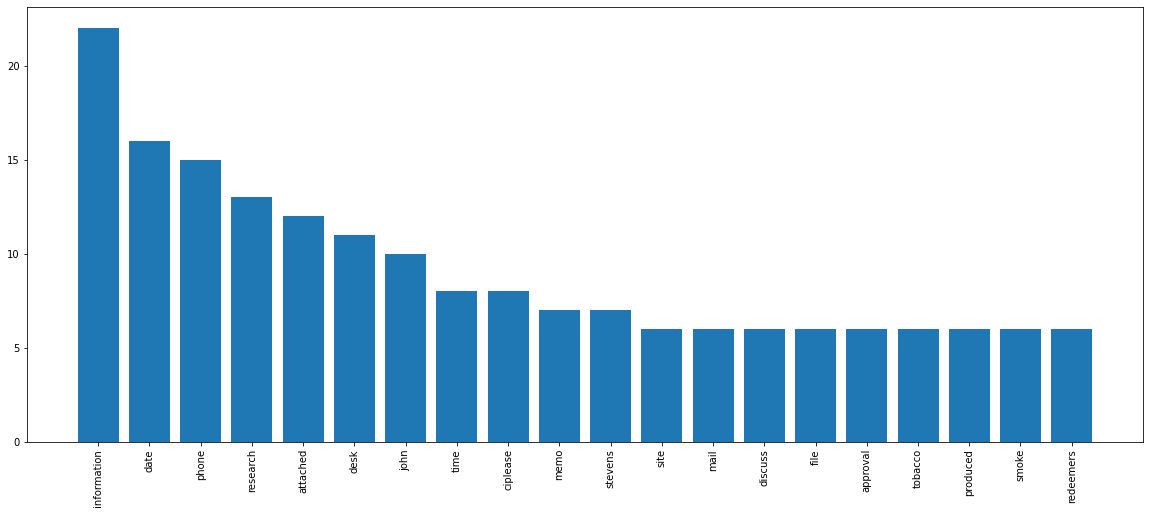

Frequency Distribution for Top 20 Tokens For Form:



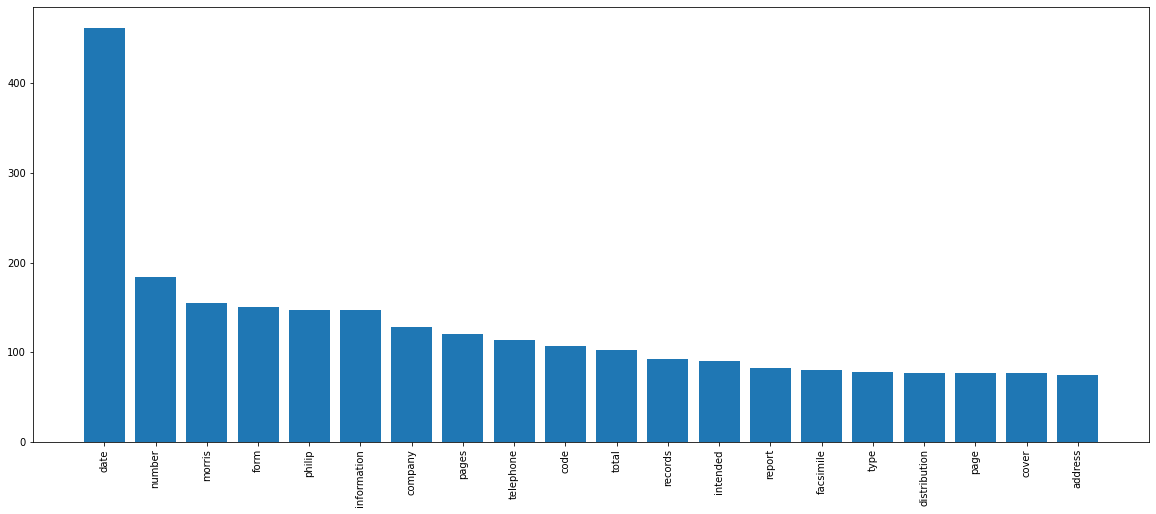

Frequency Distribution for Top 20 Tokens For Email:



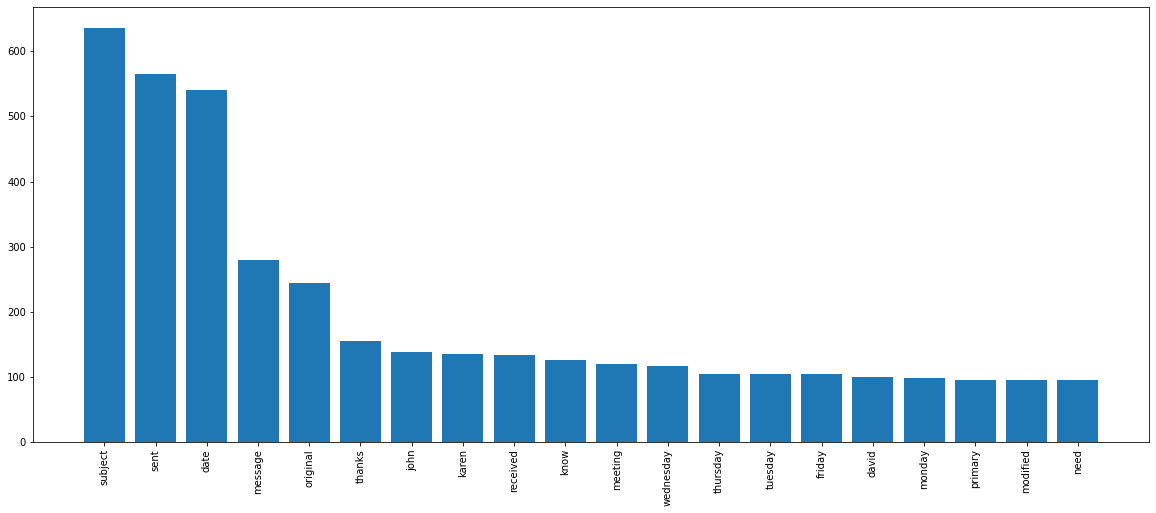

Frequency Distribution for Top 20 Tokens For Letter:



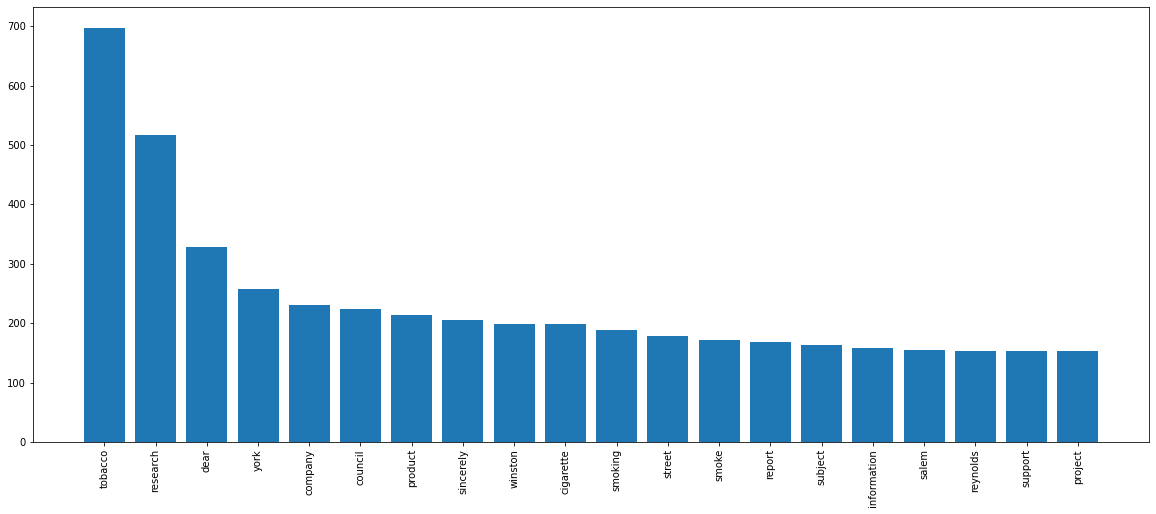

Frequency Distribution for Top 20 Tokens For News:



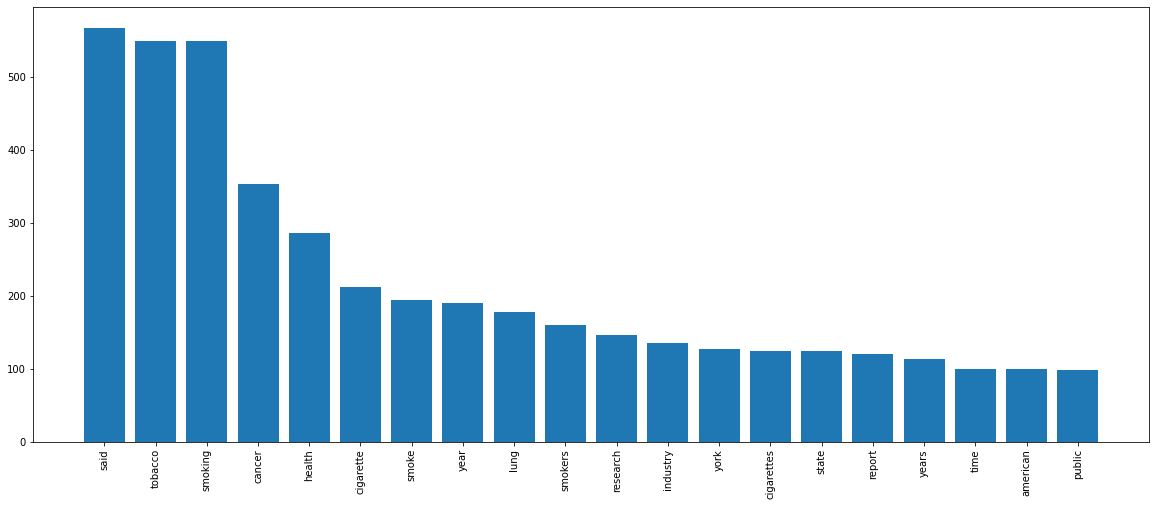

Frequency Distribution for Top 20 Tokens For ADVE:



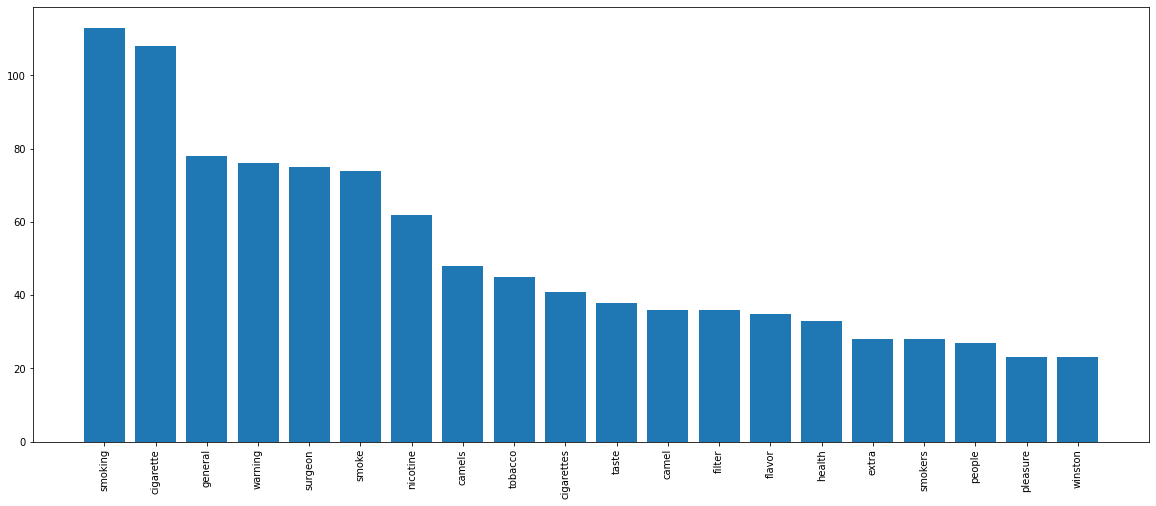

Frequency Distribution for Top 20 Tokens For Memo:



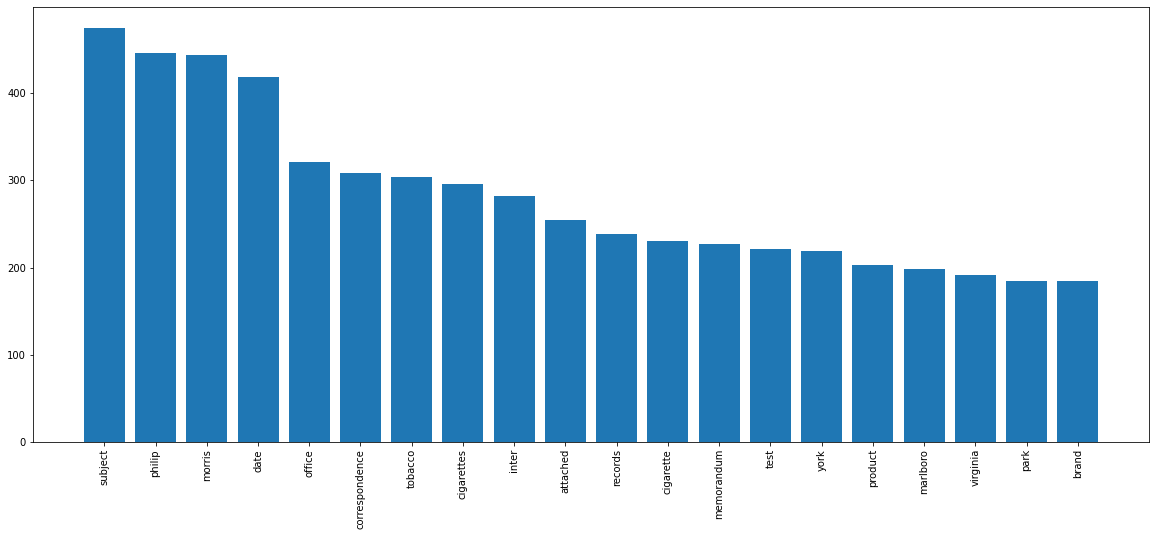

Frequency Distribution for Top 20 Tokens For Resume:



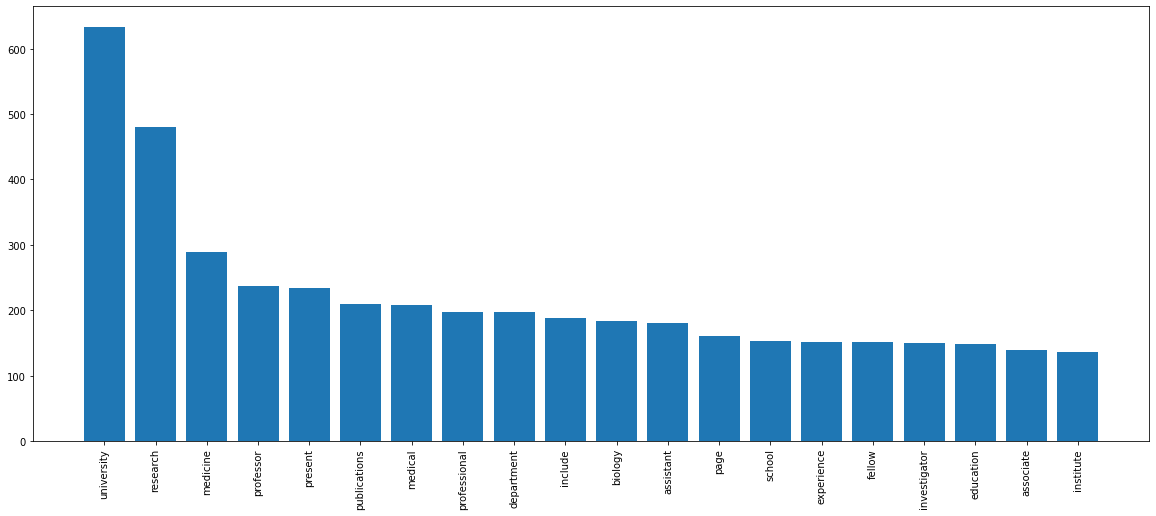

Frequency Distribution for Top 20 Tokens For Scientific:



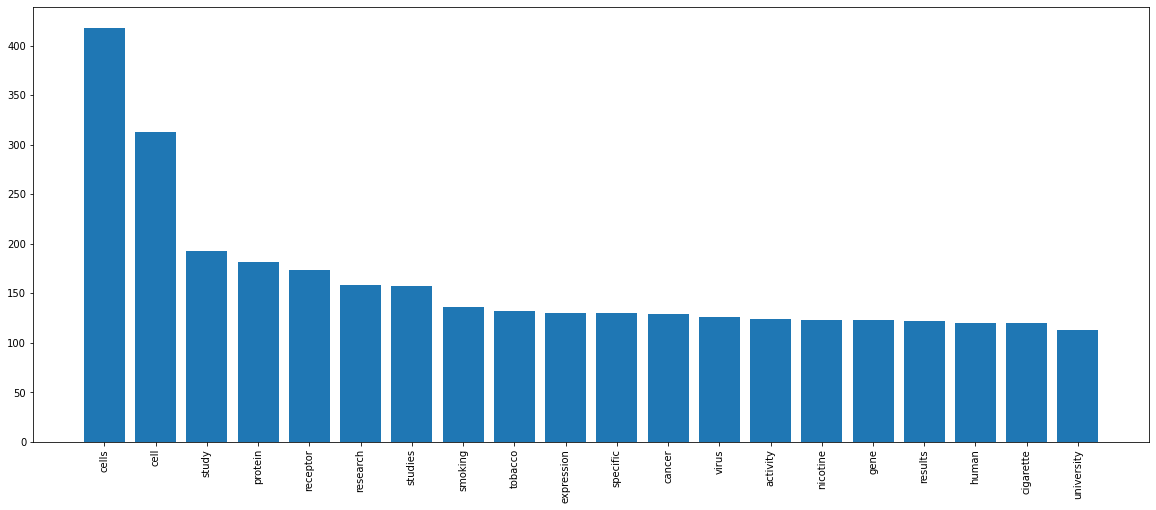

Frequency Distribution for Top 20 Tokens For Report:



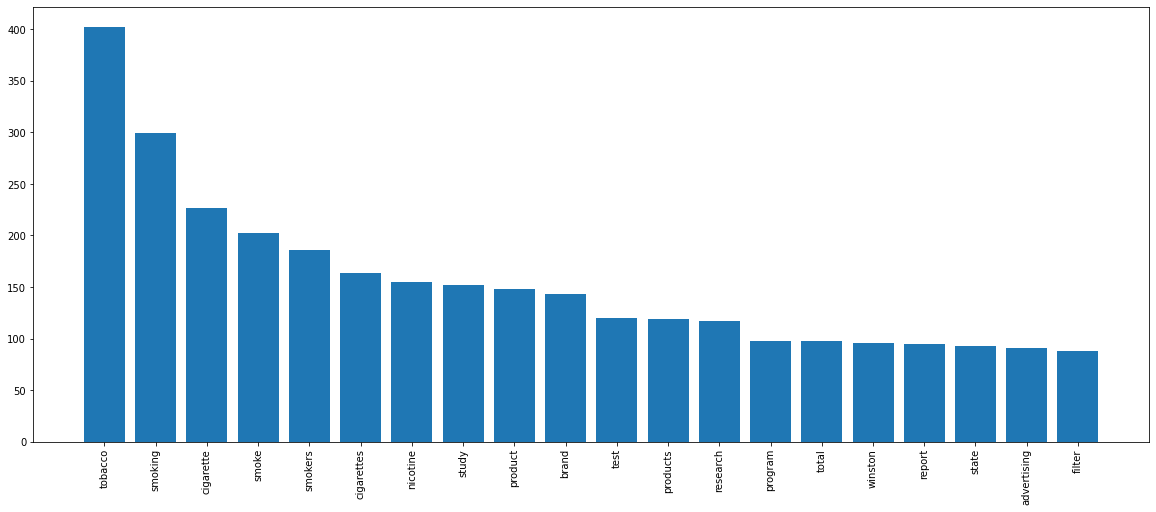

In [79]:
for label in labels:
  temp_text = ' '.join(imgpath_text_df_en[imgpath_text_df_en['label']==label]['clean_text_without_stopwords'])
  temp_tokens = word_tokenize(temp_text)
  fdist_temp = FreqDist(temp_tokens)
  fdist_top_20_temp = fdist_temp.most_common(20)
  print('Frequency Distribution for Top 20 Tokens For '+label+':\n')
  plt.figure(figsize=(20,8))
  plt.bar(*zip(*fdist_top_20_temp))
  plt.xticks(rotation=90)
  plt.show()

###**Lexical Dispersion Plot for Collective Text Data**

In [93]:
# Creating a list of words from the corpus text
list_text = [text.split() for text in imgpath_text_df_en['clean_text_without_stopwords']]
display(list_text)

[['cane',
  'cirneten',
  'tharjen',
  'thew',
  'dete',
  'plane',
  'atrsd',
  'phone',
  'atechutr',
  'asfrneto'],
 ['produc',
  'site',
  'health',
  'policy',
  'center',
  'batta',
  'gori',
  'barr',
  'road',
  'bethesda',
  'telephone',
  'telefax',
  'mail',
  'gorigb',
  'date',
  'time',
  'mark',
  'smith',
  'greetings',
  'mark',
  'thoughts',
  'proposal',
  'touch',
  'base',
  'sharon',
  'regards',
  'gori',
  'page',
  'pages',
  'page'],
 ['slzese',
  'stupts',
  'cover',
  'froo',
  'lavwel',
  'agase',
  'qeesse',
  'coven',
  'detee',
  'fist',
  'suce',
  'areow',
  'lanse',
  'pended',
  'fated',
  'frese',
  'woud',
  'mene',
  'prrs',
  'oees',
  'deer',
  'tiald',
  'waldo',
  'fect'],
 ['ceol',
  'chance',
  'recordive',
  'cork',
  'radel',
  'seen',
  'stout',
  'ofau',
  'untuerer',
  'kivd',
  'bechon',
  'webs',
  'laws',
  'heawe',
  'vebt',
  'adwint',
  'ster',
  'gerace',
  'mele',
  'budten',
  'cock',
  'lunos',
  'bled',
  'sage',
  'geek',
  

In [96]:
# getting top 10 words to be plotted
all_tokens = word_tokenize(all_text)
fdist_all = FreqDist(all_tokens)
fdist_top_10_all = fdist_all.most_common(10)
top_10_words = [tup[0] for tup in fdist_top_10_all]
display(top_10_words)

['tobacco',
 'date',
 'research',
 'smoking',
 'subject',
 'cigarette',
 'smoke',
 'university',
 'cigarettes',
 'study']

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks l

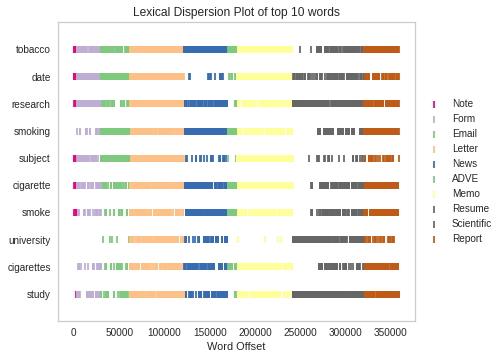

In [101]:
# Creating the visualizer and drawing the plot
y=imgpath_text_df_en['label']
ldp_visualizer = DispersionPlot(top_10_words,colormap="Accent",title="Lexical Dispersion Plot of top 10 words")
ldp_visualizer.fit(list_text,y)
ldp_visualizer.show()